In [31]:
import pandas as pd
import numpy as np
import datetime as dt
import math as m

In [32]:
import yfinance as yf
yf.__version__

'0.2.3'

In [33]:
data = yf.download("^NSEI", period="15y", interval="3mo")
data = data.iloc[:-2, :]
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,15629.650391,17153.500000,15450.900391,17132.199219,17132.199219,20185800
2021-09-01,17185.599609,18604.449219,16782.400391,16983.199219,16983.199219,20459900
2021-12-01,17104.400391,18350.949219,16203.250000,16793.900391,16793.900391,16554900
2022-03-01,16593.099609,18114.650391,15671.450195,16584.550781,16584.550781,19960800
2022-06-01,16594.400391,17992.199219,15183.400391,17759.300781,17759.300781,16578900


In [34]:
data.shape

(59, 6)

In [35]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [36]:
data.shape

(59, 6)

In [37]:
df = data[:-2]
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,13062.200195,15431.750000,12962.799805,14529.150391,14529.150391,39511400
2021-03-01,14702.500000,15606.349609,14151.400391,15582.799805,15582.799805,29091400
2021-06-01,15629.650391,17153.500000,15450.900391,17132.199219,17132.199219,20185800
2021-09-01,17185.599609,18604.449219,16782.400391,16983.199219,16983.199219,20459900
2021-12-01,17104.400391,18350.949219,16203.250000,16793.900391,16793.900391,16554900


In [38]:
df.shape

(57, 6)

In [39]:
df['return'] = df['Close'].pct_change()
df.head(10)

/tmp/ipykernel_18376/78158869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return'] = df['Close'].pct_change()


,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2007-12-01,6136.750000,6357.100098,4448.500000,5223.500000,5223.500000,0,NaN
2008-03-01,5222.799805,5298.850098,4468.549805,4870.100098,4870.100098,0,-0.067656
2008-06-01,4869.250000,4908.799805,3790.199951,4360.000000,4360.000000,0,-0.104741
2008-09-01,4356.100098,4558.000000,2252.750000,2755.100098,2755.100098,0,-0.368096
2008-12-01,2755.149902,3147.199951,2570.699951,2763.649902,2763.649902,0,0.003103
2009-03-01,2764.600098,4509.399902,2539.449951,4448.950195,4448.950195,0,0.609810
2009-06-01,4450.399902,4743.750000,3918.750000,4662.100098,4662.100098,0,0.047910
2009-09-01,4662.200195,5181.950195,4538.500000,5032.700195,5032.700195,0,0.079492
2009-12-01,5039.700195,5310.850098,4675.399902,4922.299805,4922.299805,0,-0.021937


In [40]:
import seaborn as sns

<AxesSubplot:xlabel='return', ylabel='Count'>

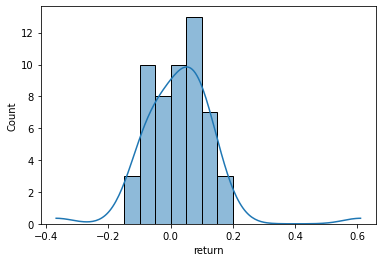

In [41]:
sns.histplot(data=df["return"],binwidth=0.05, binrange=(-0.3, 0.3), stat='count', kde=True)

In [42]:
df['return'].describe()

count    56.000000
mean      0.028182
std       0.124105
min      -0.368096
25%      -0.048553
50%       0.030341
75%       0.085892
max       0.609810
Name: return, dtype: float64

In [61]:
returns = df[1:]['return']
returns.head(10)

Date
2008-03-01   -0.067656
2008-06-01   -0.104741
2008-09-01   -0.368096
2008-12-01    0.003103
2009-03-01    0.609810
2009-06-01    0.047910
2009-09-01    0.079492
2009-12-01   -0.021937
2010-03-01    0.033318
2010-06-01    0.062147
Name: return, dtype: float64

In [44]:
losing_streaks = []

losing_streak = []
for ret in returns:
    ret = round(float(ret), 2)
    # print(ret)
    if ret < 0:
        losing_streak.append(ret*100)
    else:
        if len(losing_streak) >1:
            losing_streaks.append(losing_streak)
        losing_streak = []
print(f"Nifty losing streaks on monthly basis since 2009:")
losing_streaks

Nifty losing streaks on monthly basis since 2009:


[[-7.000000000000001, -10.0, -37.0],
 [-9.0, -3.0],
 [-5.0, -5.0],
 [-7.000000000000001, -1.0],
 [-7.000000000000001, -14.000000000000002]]

In [45]:
winning_streaks = []

winning_streak = []
for ret in returns:
    ret = round(float(ret*100), 2)
    # print(ret)
    if ret > 0:
        winning_streak.append(ret)
    else:
        if len(winning_streak) > 1: 
            winning_streaks.append(winning_streak)
        winning_streak = []
print(f"Nifty winning streaks on monthly basis since 2009:")
winning_streaks

Nifty winning streaks on monthly basis since 2009:


[[0.31, 60.98, 4.79, 7.95],
 [3.33, 6.21, 8.52],
 [6.79, 11.82],
 [12.87, 1.63, 15.18, 10.02, 7.97, 2.98],
 [16.79, 7.67],
 [7.97, 8.35, 3.08, 3.11, 2.6, 2.32, 8.8],
 [18.86, 13.89, 12.03, 7.25, 9.94]]

`Average returns on monthly ITM call`  

In [46]:
itm_call_df = df
itm_call_df.head()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2007-12-01,6136.750000,6357.100098,4448.500000,5223.500000,5223.500000,0,NaN
2008-03-01,5222.799805,5298.850098,4468.549805,4870.100098,4870.100098,0,-0.067656
2008-06-01,4869.250000,4908.799805,3790.199951,4360.000000,4360.000000,0,-0.104741
2008-09-01,4356.100098,4558.000000,2252.750000,2755.100098,2755.100098,0,-0.368096
2008-12-01,2755.149902,3147.199951,2570.699951,2763.649902,2763.649902,0,0.003103


In [47]:
itm_call_df.shape

(57, 7)

In [48]:
itm_call_df["points_gained"] = itm_call_df["Close"].diff()
itm_call_df.head(10)

/tmp/ipykernel_18376/220690599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itm_call_df["points_gained"] = itm_call_df["Close"].diff()


,Open,High,Low,Close,Adj Close,Volume,return,points_gained
Date,,,,,,,,
2007-12-01,6136.750000,6357.100098,4448.500000,5223.500000,5223.500000,0,NaN,NaN
2008-03-01,5222.799805,5298.850098,4468.549805,4870.100098,4870.100098,0,-0.067656,-353.399902
2008-06-01,4869.250000,4908.799805,3790.199951,4360.000000,4360.000000,0,-0.104741,-510.100098
2008-09-01,4356.100098,4558.000000,2252.750000,2755.100098,2755.100098,0,-0.368096,-1604.899902
2008-12-01,2755.149902,3147.199951,2570.699951,2763.649902,2763.649902,0,0.003103,8.549805
2009-03-01,2764.600098,4509.399902,2539.449951,4448.950195,4448.950195,0,0.609810,1685.300293
2009-06-01,4450.399902,4743.750000,3918.750000,4662.100098,4662.100098,0,0.047910,213.149902
2009-09-01,4662.200195,5181.950195,4538.500000,5032.700195,5032.700195,0,0.079492,370.600098
2009-12-01,5039.700195,5310.850098,4675.399902,4922.299805,4922.299805,0,-0.021937,-110.400391


In [49]:
itm_call_df["call_price"] = itm_call_df["Close"] * 0.066
cp = itm_call_df["call_price"].shift(periods=1)
cp.head()

/tmp/ipykernel_18376/202879891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itm_call_df["call_price"] = itm_call_df["Close"] * 0.066


Date
2007-12-01           NaN
2008-03-01    344.751000
2008-06-01    321.426606
2008-09-01    287.760000
2008-12-01    181.836606
Name: call_price, dtype: float64

In [50]:
itm_call_df["call_price"] = cp
itm_call_df.head()

/tmp/ipykernel_18376/358166551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itm_call_df["call_price"] = cp


,Open,High,Low,Close,Adj Close,Volume,return,points_gained,call_price
Date,,,,,,,,,
2007-12-01,6136.750000,6357.100098,4448.500000,5223.500000,5223.500000,0,NaN,NaN,NaN
2008-03-01,5222.799805,5298.850098,4468.549805,4870.100098,4870.100098,0,-0.067656,-353.399902,344.751000
2008-06-01,4869.250000,4908.799805,3790.199951,4360.000000,4360.000000,0,-0.104741,-510.100098,321.426606
2008-09-01,4356.100098,4558.000000,2252.750000,2755.100098,2755.100098,0,-0.368096,-1604.899902,287.760000
2008-12-01,2755.149902,3147.199951,2570.699951,2763.649902,2763.649902,0,0.003103,8.549805,181.836606


In [51]:
itm_call_df["max_loss"] = itm_call_df["call_price"] * 50 * (-1)
itm_call_df.head()

/tmp/ipykernel_18376/2784610436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itm_call_df["max_loss"] = itm_call_df["call_price"] * 50 * (-1)


,Open,High,Low,Close,Adj Close,Volume,return,points_gained,call_price,max_loss
Date,,,,,,,,,,
2007-12-01,6136.750000,6357.100098,4448.500000,5223.500000,5223.500000,0,NaN,NaN,NaN,NaN
2008-03-01,5222.799805,5298.850098,4468.549805,4870.100098,4870.100098,0,-0.067656,-353.399902,344.751000,-17237.550000
2008-06-01,4869.250000,4908.799805,3790.199951,4360.000000,4360.000000,0,-0.104741,-510.100098,321.426606,-16071.330322
2008-09-01,4356.100098,4558.000000,2252.750000,2755.100098,2755.100098,0,-0.368096,-1604.899902,287.760000,-14388.000000
2008-12-01,2755.149902,3147.199951,2570.699951,2763.649902,2763.649902,0,0.003103,8.549805,181.836606,-9091.830322


In [52]:
delta = 0.9
gamma = 0.0002
itm_call_df['price_for_points'] = itm_call_df["points_gained"] * delta * 50 * 0.90
itm_call_df.tail(10)

/tmp/ipykernel_18376/520889545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itm_call_df['price_for_points'] = itm_call_df["points_gained"] * delta * 50 * 0.90


,Open,High,Low,Close,Adj Close,Volume,return,points_gained,call_price,max_loss,price_for_points
Date,,,,,,,,,,,
2019-09-01,10960.950195,12158.799805,10670.250000,12056.049805,12056.049805,40849000,0.093693,1032.799805,727.534500,-36376.725000,41828.392090
2019-12-01,12137.049805,12430.500000,11175.049805,11201.750000,11201.750000,33713400,-0.070861,-854.299805,795.699287,-39784.964355,-34599.142090
2020-03-01,11387.349609,11433.000000,7511.100098,9580.299805,9580.299805,47715200,-0.144750,-1621.450195,739.315500,-36965.775000,-65668.732910
2020-06-01,9726.849609,11794.250000,9544.349609,11387.500000,11387.500000,45454500,0.188637,1807.200195,632.299787,-31614.989355,73191.607910
2020-09-01,11464.299805,13145.849609,10790.200195,12968.950195,12968.950195,37535500,0.138876,1581.450195,751.575000,-37578.750000,64048.732910
2020-12-01,13062.200195,15431.750000,12962.799805,14529.150391,14529.150391,39511400,0.120303,1560.200195,855.950713,-42797.535645,63188.107910
2021-03-01,14702.500000,15606.349609,14151.400391,15582.799805,15582.799805,29091400,0.072520,1053.649414,958.923926,-47946.196289,42672.801270
2021-06-01,15629.650391,17153.500000,15450.900391,17132.199219,17132.199219,20185800,0.099430,1549.399414,1028.464787,-51423.239355,62750.676270
2021-09-01,17185.599609,18604.449219,16782.400391,16983.199219,16983.199219,20459900,-0.008697,-149.000000,1130.725148,-56536.257422,-6034.500000


In [53]:
itm_call_df["profit"] = itm_call_df[["max_loss", "price_for_points"]].max(axis=1)
itm_call_df.head()

/tmp/ipykernel_18376/3854232310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itm_call_df["profit"] = itm_call_df[["max_loss", "price_for_points"]].max(axis=1)


,Open,High,Low,Close,Adj Close,Volume,return,points_gained,call_price,max_loss,price_for_points,profit
Date,,,,,,,,,,,,
2007-12-01,6136.750000,6357.100098,4448.500000,5223.500000,5223.500000,0,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-01,5222.799805,5298.850098,4468.549805,4870.100098,4870.100098,0,-0.067656,-353.399902,344.751000,-17237.550000,-14312.696045,-14312.696045
2008-06-01,4869.250000,4908.799805,3790.199951,4360.000000,4360.000000,0,-0.104741,-510.100098,321.426606,-16071.330322,-20659.053955,-16071.330322
2008-09-01,4356.100098,4558.000000,2252.750000,2755.100098,2755.100098,0,-0.368096,-1604.899902,287.760000,-14388.000000,-64998.446045,-14388.000000
2008-12-01,2755.149902,3147.199951,2570.699951,2763.649902,2763.649902,0,0.003103,8.549805,181.836606,-9091.830322,346.267090,346.267090


In [54]:
itm_call_df["profit"].describe()

count       56.000000
mean     10175.706244
std      28214.828700
min     -36965.775000
25%     -14331.522034
50%      10117.920410
75%      27029.691101
max      73191.607910
Name: profit, dtype: float64

In [55]:
itm_call_df.to_csv("itm_monthly_call_strategy_nifty.csv")

`Calculate net profit (approx.)`  

In [56]:
sum(itm_call_df["profit"][1:])

569839.549658203

In [57]:
itm_call_df.index

DatetimeIndex(['2007-12-01', '2008-03-01', '2008-06-01', '2008-09-01',
               '2008-12-01', '2009-03-01', '2009-06-01', '2009-09-01',
               '2009-12-01', '2010-03-01', '2010-06-01', '2010-09-01',
               '2010-12-01', '2011-03-01', '2011-06-01', '2011-09-01',
               '2011-12-01', '2012-03-01', '2012-06-01', '2012-09-01',
               '2012-12-01', '2013-03-01', '2013-06-01', '2013-09-01',
               '2013-12-01', '2014-03-01', '2014-06-01', '2014-09-01',
               '2014-12-01', '2015-03-01', '2015-06-01', '2015-09-01',
               '2015-12-01', '2016-03-01', '2016-06-01', '2016-09-01',
               '2016-12-01', '2017-03-01', '2017-06-01', '2017-09-01',
               '2017-12-01', '2018-03-01', '2018-06-01', '2018-09-01',
               '2018-12-01', '2019-03-01', '2019-06-01', '2019-09-01',
               '2019-12-01', '2020-03-01', '2020-06-01', '2020-09-01',
               '2020-12-01', '2021-03-01', '2021-06-01', '2021-09-01',
      

`Filter by date `  

In [66]:
from_date = dt.datetime(year=2016, month=12, day=1)
selected_df = itm_call_df.loc[from_date:] 
sum(selected_df["profit"])


375763.6737304687

`Median call price`  

In [67]:
import statistics
statistics.median(selected_df["call_price"]) * 50

36376.725

`Cumulative profits`  

In [68]:
# cum_profits["Date"] = selected_df["Date"]
# cum_profits["cum_profit"] = selected_df["profit"].cumsum()
# cum_profits.head(10)